## Chapter9:独立同一分布
互いに独立で, さらにそれぞれの確率分布に従う多次元確率変数を独立同一分布という,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from stats_package.modules import *

np.random.seed(0)
%precision 3
%matplotlib inline

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [18]:
linestyles = ["-", "--", ":", "-."]

def E(XY, g):
    '''
    docstring
    一般化された期待値を求める関数
    _がprefixにつくと使用者が意識しなくて良い変数として扱う意味があった気がする
    '''
    _x_set, _y_set, f_XY = XY
    return np.sum([g(x_i, y_j)*f_XY(x_i, y_j) 
                   for x_i in _x_set for y_j in _y_set])

def Cov(XY):
    _x_set, _y_set, f_XY = XY
    _mean_X = E(XY, lambda x,y: x)
    _mean_Y = E(XY, lambda x,y: y)
    return np.sum([(x_i-_mean_X)*(y_j-_mean_Y)*f_XY(x_i, y_j)
                   for x_i in _x_set for y_j in _y_set])

def f_X(x):
    '''
    Xの周辺確率分布を求める関数
    '''
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    '''
    Yの周辺確率分布を求める関数
    '''
    return np.sum([f_XY(x_k, y) for x_k in x_set])

### 9.1:独立性
#### 9.1.1:独立性の定義
XとYが独立性を持つ時, 同時確率は周辺確率の積で表す事ができる
$$
f_{X,Y}(x,y) = f_X(x)f_Y(y)
$$
より一般にn次元の確率変数に拡張すると

$$
f_{X1,X2,...,Xn}(x1,x2,...,xn) = f_{X1}(x1)f_{X2}(x2)...f_{Xn}(xn)
$$

の様になる

#### 9.1.2:独立性と無相関性
無相関より独立性の方が強い概念,
XとYが独立→無相関
XとYが無相関とは言っても独立しているとは言えない

In [19]:
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y / 441
    else:
        return 0 
    
XY = [x_set, y_set, f_XY]

このXYは独立なので無相関のはず。共分散で調べる。 

In [20]:
Cov(XY)

-8.326672684688674e-17

次に無相関な2つの確率変数を考える.
例として{(0,0),(1,1),(1,-1)}でそれぞれの確率(1/3)が等しい二次元確率変数(X,Y)を使う.

In [21]:
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x, y):
    if (x,y) in [(0,0), (1,1), (1,-1)]:
        return 1/3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [22]:
Cov(XY)

0.0

In [24]:
f_X(0)*f_Y(0),f_XY(0,0) #f_X(0)*f_Y(0) \= f_XY(0,0)

(0.1111111111111111, 0.333)

## 9.2:和の分布
標本平均の分布を考えるために和の分布について考える
$$
\sum_{i=1}^{n}X_n=X_1+X_2+...+X_n
$$
の分布を見ていく, 和の分布の確率関数や密度関数を直接導くのは難しいので期待値と分散について見ていく
$$
E(X_1+X_2+...+X_n)=E(X_1)+E(X_2)+E(X_n)
$$
確率変数がそれぞれ独立の場合, 共分散項が0になるので同様に和で表せる
### 9.2.1:正規分布の和の分布
互いに独立なX~N(1,2), Y~N(2,3)を考える.
E(X+Y)=3, V(X+Y)=5となる
Pythonで求めると, XとYから無作為抽出をしそれらの和をとる事でX＋Yの標本データをえる.

In [36]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample+Y_sample

np.mean(sum_smaple), np.var(sum_smaple)

(3.002103130595829, 5.00099737369946)

独立な確率分布がその和も同じ分布になることを**再生性**という.
全ての確率分布がこの性質を備えているわけではなく正規分布などがこれに該当する.
X+Y~N(3,5)を例にしてみる

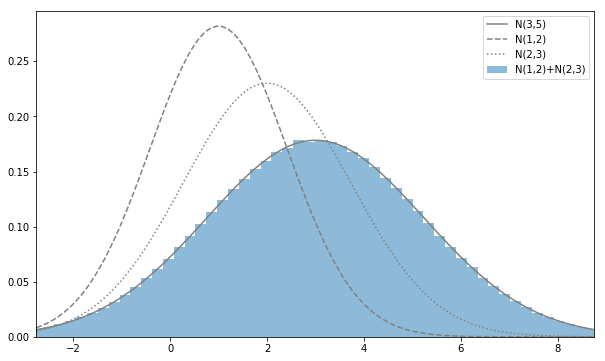

In [37]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv=stats.norm(3,np.sqrt(5))
xs=np.linspace(rv.isf(0.995),rv.isf(0.005),100)

ax.hist(sum_sample,bins=100,density=True,alpha=.5,label="N(1,2)+N(2,3)")
ax.plot(xs,rv.pdf(xs),label="N(3,5)", color="gray")
ax.plot(xs,rv1.pdf(xs),label="N(1,2)", ls="--", color="gray")
ax.plot(xs,rv2.pdf(xs),label="N(2,3)", ls=":", color="gray")

ax.legend()
ax.set_xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

ヒストグラムと密度関数がきれいに一致する

より一般化すると
$$
\sum_{i=1}^{n}X_i \sim N(\sum_{i=1}^{n}\mu_i,\sum_{i=1}^{n}\sigma_i^2)
$$
となる.
### ポアソン分布の和の分布
X~Poi(3)とY~Poi(4)の場合を考える, 期待値・分散共に$\lambda$なので
X+Y~Poi(7)となり期待値・分散はどちらも7となる, ポアソン分布も再生性を持つ分布である. 
これを確認してみる. 

In [39]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample+Y_sample

np.mean(sum_sample), np.var(sum_sample) #期待値, 分散

(6.995938, 6.996069500156)

正規分布同様Poi(7)の分布はPoi(3)+Poi(4)と一致し一般化できる

### 9.2.3:ベルヌーイ分布の和の分布
$$
X_1,X_2,...X_{10} \sim Bern(0.3), \sum_{i=1}^{10}X_i
$$
を考える. $Bern(p)$のときの期待値はp, 分散はp(1-p)なので
それぞれ0.3, 0.21となるはず

In [41]:
p =0.3
rv=stats.bernoulli(p)

sample_size=int(1e6)
Xs_sample=rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample,axis=0)

np.mean(sum_sample), np.var(sum_sample)

(3.000999, 2.1053760019989998)

上記の通り平均と分散は一致するが分布の方は再生性は**持たない**  
ただしベルヌーイ分布の和の分布はn,pをパラメタに持つ**二項分布**となる.  
今回はn=10,p=0.3なので$\sum_{i=1}^{10}X_i~Bin(10,0.3)$となる. 

このヒストグラムを確認する

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


<function matplotlib.pyplot.show(*args, **kw)>

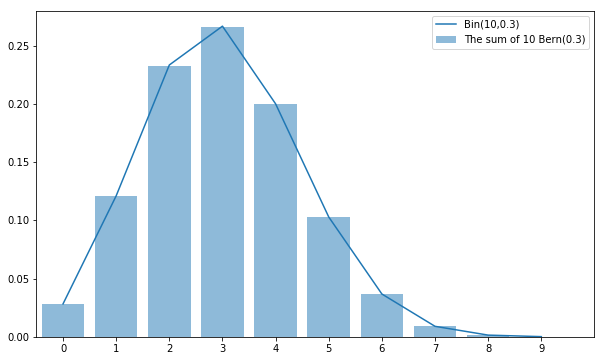

In [46]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

rv=stats.binom(10,p)
xs=np.arange(10)

hist, _ =np.histogram(sum_sample,bins=10,range=(0,10),normed=True)
ax.bar(xs,hist,alpha=0.5,label="The sum of 10 Bern(0.3)")
ax.plot(xs,rv.pmf(xs),label="Bin(10,0.3)")
ax.legend()
ax.set_xlim(-0.5,10)
ax.set_xticks(np.arange(10))
plt.show

p=0.3の10個のベルヌーイ分布とn=10,p=0.3の二項分布が一致している

## 9.3:標本平均の分布
ここまで和の分布を見てきたので次に標本平均について見ていく, 期待値の線形性などを使って  
標本平均の期待値と分散はそれぞれ$\mu$,$\frac{\sigma^2}{n}$となる

これらは母平均の区間推定(10章)や検定(11章)で重要になってくる

### 9.3.1:正規分布の標本平均の分布
単純に
$$
\overline{X}\sim N(\mu,\frac{\sigma^2}{n})
$$
に従う分布になるのでグラフは割愛する

### 9.3.2:ポアソン分布の標本平均の分布
n=10, λ=3として標本平均を調べる. 期待値3, 分散3/10となるはず

In [47]:
l=3
rv=stats.poisson(l)

n=10
sample_size=int(1e6)
Xs_sample = rv.rvs((n,sample_size))
sample_mean=np.mean(Xs_sample,axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.9999304, 0.29994425515584006)

これはもうポアソン分布には従ってはいない, 分布を見てみる

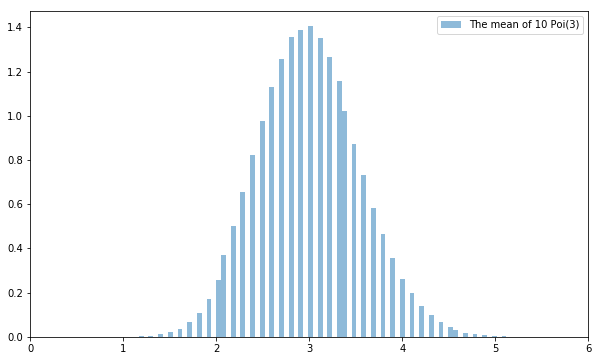

In [48]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.hist(sample_mean,bins=100,density=True,
       alpha=.5,label="The mean of 10 Poi(3)")

ax.legend()
ax.set_xlim(0,6)
plt.show()

$\overline{X}\sim N(3,0,3)$の正規分布に近似, 次の中心極限定りで説明できる

### 中心極限定理
再生性を持たない複雑な和の分布やポアソン分布の標本平均の分布の様に分布の形がどうなるかわからない分布については,  
便利なこの定理を用いる, ザックリいってしまうと「確率変数が独立である期待値が
$\mu$,分散$\sigma$の確率分布に従う標本平均の分布はnが大きくなるにつれ正規分布に近づいていく.  

これをポアソン分布を用いて確かめる

In [53]:
l=3
rv=stats.poisson(l)

n=10000
sample_size=10000
Xs_sample = rv.rvs((n,sample_size))
sample_mean=np.mean(Xs_sample,axis=0)
rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)

$\overline{X}$は近似的に$N(3,3/10000)$に従うはずなのでそれと共にプロットする

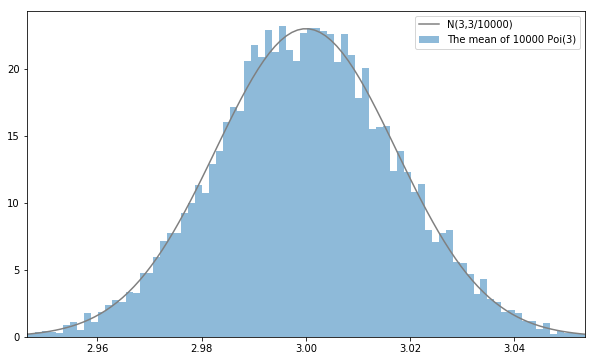

In [57]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.hist(sample_mean,bins=100,density=True,
       alpha=.5,label="The mean of 10000 Poi(3)")
ax.plot(xs, rv_true.pdf(xs),label="N(3,3/10000)",color="gray")

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

大体一致している.

### 9.3.4:大数の法則
これはいいかな, 標本平均は試行回数を重ねると母平均に収束するということ